# Data Analysis on Youtube Video Statistics

In [1]:
import pandas as pd
import json
import os 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

* Importing all Data

In [2]:
g=os.listdir()
all_csv=[]
for x in g:
    if ".csv" in x:
        all_csv.append(x)
all_csv

['CAvideos.csv',
 'DEvideos.csv',
 'FRvideos.csv',
 'GBvideos.csv',
 'INvideos.csv',
 'MXvideos.csv',
 'RUvideos.csv',
 'USvideos.csv']

In [3]:
all_data=[]
for x in all_csv:
    df=pd.read_csv(x,encoding_errors='ignore')
    df['country']=x[0:2]
    all_data.append(df)
all_data[0].head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


* Combining all data into a single dataframe

In [4]:
combined_data=pd.concat(all_data,axis=0)
combined_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US


In [5]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320852 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                320852 non-null  object
 1   trending_date           320852 non-null  object
 2   title                   320852 non-null  object
 3   channel_title           320852 non-null  object
 4   category_id             320852 non-null  int64 
 5   publish_time            320852 non-null  object
 6   tags                    320852 non-null  object
 7   views                   320852 non-null  int64 
 8   likes                   320852 non-null  int64 
 9   dislikes                320852 non-null  int64 
 10  comment_count           320852 non-null  int64 
 11  thumbnail_link          320852 non-null  object
 12  comments_disabled       320852 non-null  bool  
 13  ratings_disabled        320852 non-null  bool  
 14  video_error_or_removed  320852 non-null  b

In [6]:
combined_data.isna().sum()

video_id                      0
trending_date                 0
title                         0
channel_title                 0
category_id                   0
publish_time                  0
tags                          0
views                         0
likes                         0
dislikes                      0
comment_count                 0
thumbnail_link                0
comments_disabled             0
ratings_disabled              0
video_error_or_removed        0
description               14191
country                       0
dtype: int64

In [7]:
combined_data.head(5)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


* Converting into standard datatypes.

In [8]:
combined_data['video_id']=combined_data['video_id'].astype("str")
combined_data['trending_date']=combined_data['trending_date'].astype('str')

combined_data['title']=combined_data['title'].astype('str')
combined_data['channel_title']=combined_data['channel_title'].astype('str')

In [9]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320852 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype 
---  ------                  --------------   ----- 
 0   video_id                320852 non-null  object
 1   trending_date           320852 non-null  object
 2   title                   320852 non-null  object
 3   channel_title           320852 non-null  object
 4   category_id             320852 non-null  int64 
 5   publish_time            320852 non-null  object
 6   tags                    320852 non-null  object
 7   views                   320852 non-null  int64 
 8   likes                   320852 non-null  int64 
 9   dislikes                320852 non-null  int64 
 10  comment_count           320852 non-null  int64 
 11  thumbnail_link          320852 non-null  object
 12  comments_disabled       320852 non-null  bool  
 13  ratings_disabled        320852 non-null  bool  
 14  video_error_or_removed  320852 non-null  b

In [10]:
combined_data['trending_date']

0        17.14.11
1        17.14.11
2        17.14.11
3        17.14.11
4        17.14.11
           ...   
40944    18.14.06
40945    18.14.06
40946    18.14.06
40947    18.14.06
40948    18.14.06
Name: trending_date, Length: 320852, dtype: object

In [11]:
combined_data['trending_date']=combined_data['trending_date'].astype('str')
data_points=(combined_data['trending_date'].str.split("."))

combined_data['year']=data_points.str[0].astype(int)
combined_data['day']=data_points.str[1].astype(int)
combined_data['month']=data_points.str[2].astype(int)

In [12]:
combined_data["year"]=np.array(combined_data['year'])+2000

In [13]:
combined_data.head(15)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,year,day,month
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017,14,11
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017,14,11
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,2017,14,11
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017,14,11
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,2017,14,11
5,0yIWz1XEeyc,17.14.11,Jake Paul Says Alissa Violet CHEATED with LOGA...,DramaAlert,25,2017-11-13T07:37:51.000Z,"#DramaAlert|""Drama""|""Alert""|""DramaAlert""|""keem...",1309699,103755,4613,12143,https://i.ytimg.com/vi/0yIWz1XEeyc/default.jpg,False,False,False,► Follow for News! - https://twitter.com/KEEMS...,CA,2017,14,11
6,_uM5kFfkhB8,17.14.11,Vanoss Superhero School - New Students,VanossGaming,23,2017-11-12T23:52:13.000Z,"Funny Moments|""Montage video games""|""gaming""|""...",2987945,187464,9850,26629,https://i.ytimg.com/vi/_uM5kFfkhB8/default.jpg,False,False,False,Vanoss Merch Shop: https://vanoss.3blackdot.co...,CA,2017,14,11
7,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57534,2967,15959,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,CA,2017,14,11
8,JzCsM1vtn78,17.14.11,THE LOGANG MADE HISTORY. LOL. AGAIN.,Logan Paul Vlogs,24,2017-11-12T20:19:24.000Z,"logan paul vlog|""logan paul""|""logan""|""paul""|""o...",4477587,292837,4123,36391,https://i.ytimg.com/vi/JzCsM1vtn78/default.jpg,False,False,False,Join the movement. Be a Maverick ► https://Sho...,CA,2017,14,11
9,43sm-QwLcx4,17.14.11,Finally Sheldon is winning an argument about t...,Sheikh Musa,22,2017-11-10T14:10:46.000Z,"God|""Sheldon Cooper""|""Young Sheldon""",505161,4135,976,1484,https://i.ytimg.com/vi/43sm-QwLcx4/default.jpg,False,False,False,Sheldon is roasting pastor of the church\nyoun...,CA,2017,14,11


In [14]:
combined_data['trending_date']=pd.to_datetime(combined_data[['year','month','day']],format="y-m-d")

combined_data.drop(['year','month','day'],axis='columns',inplace=True)

In [15]:
combined_data

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,US
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,US
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,US
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,US


In [16]:
combined_data['title'] =combined_data['title'].astype(str)
combined_data['channel_title'] =combined_data['channel_title'].astype(str)
combined_data['category_id'] =combined_data['category_id'].astype(str) 
combined_data['tags'] =combined_data['tags'].astype(str)
combined_data['thumbnail_link'] = combined_data['thumbnail_link'].astype(str) 
combined_data['description'] = combined_data['description'].astype(str)

In [17]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320852 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                320852 non-null  object        
 1   trending_date           320852 non-null  datetime64[ns]
 2   title                   320852 non-null  object        
 3   channel_title           320852 non-null  object        
 4   category_id             320852 non-null  object        
 5   publish_time            320852 non-null  object        
 6   tags                    320852 non-null  object        
 7   views                   320852 non-null  int64         
 8   likes                   320852 non-null  int64         
 9   dislikes                320852 non-null  int64         
 10  comment_count           320852 non-null  int64         
 11  thumbnail_link          320852 non-null  object        
 12  comments_disabled       320852 non-n

In [18]:
# for better efficiency
combined_data['comments_disabled']=combined_data['comments_disabled'].astype('category')
combined_data['ratings_disabled']=combined_data['ratings_disabled'].astype('category')
combined_data['video_error_or_removed']=combined_data['video_error_or_removed'].astype('category')


In [19]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320852 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                320852 non-null  object        
 1   trending_date           320852 non-null  datetime64[ns]
 2   title                   320852 non-null  object        
 3   channel_title           320852 non-null  object        
 4   category_id             320852 non-null  object        
 5   publish_time            320852 non-null  object        
 6   tags                    320852 non-null  object        
 7   views                   320852 non-null  int64         
 8   likes                   320852 non-null  int64         
 9   dislikes                320852 non-null  int64         
 10  comment_count           320852 non-null  int64         
 11  thumbnail_link          320852 non-null  object        
 12  comments_disabled       320852 non-n

In [20]:
combined_data.isna().sum()

video_id                  0
trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
dtype: int64

In [21]:
combined_data['publish_time'] = pd.to_datetime(combined_data['publish_time'], errors='coerce', format='%Y-%m-%dT%H:%M:%S.%fZ')

In [22]:
combined_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 320852 entries, 0 to 40948
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   video_id                320852 non-null  object        
 1   trending_date           320852 non-null  datetime64[ns]
 2   title                   320852 non-null  object        
 3   channel_title           320852 non-null  object        
 4   category_id             320852 non-null  object        
 5   publish_time            320852 non-null  datetime64[ns]
 6   tags                    320852 non-null  object        
 7   views                   320852 non-null  int64         
 8   likes                   320852 non-null  int64         
 9   dislikes                320852 non-null  int64         
 10  comment_count           320852 non-null  int64         
 11  thumbnail_link          320852 non-null  object        
 12  comments_disabled       320852 non-n

In [23]:
combined_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10 17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13 17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12 19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12 18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09 11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA


In [24]:
combined_data['publish_time']=pd.to_datetime(combined_data['publish_time'])

combined_data['publish_date']=combined_data['publish_time'].dt.date
combined_data['publish_time']=combined_data['publish_time'].dt.time

In [25]:
combined_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_date
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017-11-10
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-13
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,2017-11-12
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-12
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,2017-11-09


In [26]:
combined_data.dtypes

video_id                          object
trending_date             datetime64[ns]
title                             object
channel_title                     object
category_id                       object
publish_time                      object
tags                              object
views                              int64
likes                              int64
dislikes                           int64
comment_count                      int64
thumbnail_link                    object
comments_disabled               category
ratings_disabled                category
video_error_or_removed          category
description                       object
country                           object
publish_date                      object
dtype: object

In [27]:
combined_data['publish_date']=pd.to_datetime(combined_data['publish_date'],format="%Y-%m-%d")

In [28]:
combined_data.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_date
0,n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017-11-10
1,0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-13
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,2017-11-12
3,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-12
4,2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,2017-11-09


In [29]:
combined_data.set_index('video_id',inplace=True)

In [30]:
combined_data.head()

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_date
video_id,,,,,,,,,,,,,,,,,
n1WpP7iowLc,2017-11-14,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,17:00:03,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,CA,2017-11-10
0dBIkQ4Mz1M,2017-11-14,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,17:00:00,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,CA,2017-11-13
5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,19:05:24,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,CA,2017-11-12
d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,18:01:41,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,CA,2017-11-12
2Vv-BfVoq4g,2017-11-14,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,11:04:14,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,CA,2017-11-09


In [31]:
combined_data.isna().sum()

trending_date             0
title                     0
channel_title             0
category_id               0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
publish_date              0
dtype: int64

In [32]:
combined_data.sort_values('trending_date',ascending=False,inplace=True)
combined_data

,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_date
video_id,,,,,,,,,,,,,,,,,
ooyjaVdt-jA,2018-06-14,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,20,17:09:38,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US,2018-05-17
ORghjuJRoJ0,2018-06-14,Patas| 12th June 2018 | Full Episode 789 |ETV ...,ETV Plus India,23,16:58:43,"etv Plus|""etv comedy show""|""3 Idiots""|""anchor ...",166912,1200,118,255,https://i.ytimg.com/vi/ORghjuJRoJ0/default.jpg,False,False,False,Patasపటాస్,IN,2018-06-12
BaSZ0Uj5eVI,2018-06-14,ખજુરભાઈ ની industrial visit - Khajurbhai ni moj,Khajur Bhai Ni Moj,23,06:00:01,"khajurbhai|""khajur comedy""|""jigli khajur""|""kha...",851561,11450,618,531,https://i.ytimg.com/vi/BaSZ0Uj5eVI/default.jpg,False,False,False,Khajurbhai ni moj - ખજુરભાઈ on industrial visi...,IN,2018-06-11
pS5Ng5r8cds,2018-06-14,Nani Initiates Legal Proceedings Against Sri R...,ETV Telangana,25,17:18:54,"ETV|""ETVTelugu""|""ETV NewsVideo""|""National News...",208154,477,629,448,https://i.ytimg.com/vi/pS5Ng5r8cds/default.jpg,False,False,False,Nani Initiates Legal Proceedings Against Sri R...,IN,2018-06-11
pgGFtL3tfE4,2018-06-14,32 CRAZY YET BRILLIANT CLOTHING HACKS FOR GIRLS,5-Minute Crafts,26,23:30:01,"5-Minute Crafts|""DIY""|""Do it yourself""|""crafts...",1730127,17879,2055,1094,https://i.ytimg.com/vi/pgGFtL3tfE4/default.jpg,False,False,False,----------------------------------------------...,IN,2018-06-12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
_CJN_ryETIY,2017-11-14,Harry Styles canta Sign Of The Times a X Facto...,X Factor Italia,24,23:59:08,"X Factor|""X Factor Italia""|""X Factor Italy""|""X...",199429,10175,66,539,https://i.ytimg.com/vi/_CJN_ryETIY/default.jpg,False,False,False,Super ospite del terzo Live Show di #XF11 Harr...,US,2017-11-09
afgvlR9WmIQ,2017-11-14,Maroon 5 - What Lovers Do (Live On The Ellen D...,Maroon5VEVO,10,02:21:31,Maroon 5 SZA What Lovers Do Red Pill Blues Ell...,762616,20159,336,899,https://i.ytimg.com/vi/afgvlR9WmIQ/default.jpg,False,False,False,RED PILL BLUES” is out now. http://smarturl.it...,US,2017-11-09
_qSW96a2aKY,2017-11-14,Keith Urban - Female (Official Audio),Keith Urban,24,05:01:25,"Keith Urban|""Female""|""New Music""|""Official""|""C...",754558,11985,1356,1757,https://i.ytimg.com/vi/_qSW96a2aKY/default.jpg,False,False,False,Buy or stream Female now: www.smarturl.it/KU-F...,US,2017-11-08


# Latest Top 5 Trending videos around World

In [33]:
combined_data[['title','publish_date','publish_time','trending_date', 'country']].head()

,title,publish_date,publish_time,trending_date,country
video_id,,,,,
ooyjaVdt-jA,Official Call of Duty®: Black Ops 4 — Multipla...,2018-05-17,17:09:38,2018-06-14,US
ORghjuJRoJ0,Patas| 12th June 2018 | Full Episode 789 |ETV ...,2018-06-12,16:58:43,2018-06-14,IN
BaSZ0Uj5eVI,ખજુરભાઈ ની industrial visit - Khajurbhai ni moj,2018-06-11,06:00:01,2018-06-14,IN
pS5Ng5r8cds,Nani Initiates Legal Proceedings Against Sri R...,2018-06-11,17:18:54,2018-06-14,IN
pgGFtL3tfE4,32 CRAZY YET BRILLIANT CLOTHING HACKS FOR GIRLS,2018-06-12,23:30:01,2018-06-14,IN


* Mapping the category_id with respective categories

In [34]:
j=pd.read_json('C:/Users/david/Downloads/Dataset/DE_category_id.json',encoding_errors="ignore")
j

,kind,etag,items
0,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
1,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
2,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
3,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
4,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
5,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
6,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
7,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
8,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."
9,youtube#videoCategoryListResponse,"""ld9biNPKjAjgjV7EZ4EKeEGrhao/1v2mrzYSYG6onNLt2...","{'kind': 'youtube#videoCategory', 'etag': '""ld..."


In [35]:
category_id={}
with open('DE_category_id.json', 'r') as f:
    d = json.load(f)
    for category in d['items']:
        category_id[category['id']] = category['snippet']['title']


In [36]:
category_id

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [37]:
combined_data['category_id']=combined_data['category_id'].map(category_id)
combined_data.rename(columns={'category_id':"category"},inplace=True)

In [38]:
combined_data.isna().sum()

trending_date                0
title                        0
channel_title                0
category                  2489
publish_time                 0
tags                         0
views                        0
likes                        0
dislikes                     0
comment_count                0
thumbnail_link               0
comments_disabled            0
ratings_disabled             0
video_error_or_removed       0
description                  0
country                      0
publish_date                 0
dtype: int64

In [39]:
combined_data[combined_data['category'].isna()]['country'].unique()

array(['RU', 'MX', 'DE', 'FR', 'IN', 'US', 'GB', 'CA'], dtype=object)

In [40]:
# dropping since the data is missing in the dataset
combined_data.dropna(inplace=True)

In [41]:
combined_data.isna().sum()

trending_date             0
title                     0
channel_title             0
category                  0
publish_time              0
tags                      0
views                     0
likes                     0
dislikes                  0
comment_count             0
thumbnail_link            0
comments_disabled         0
ratings_disabled          0
video_error_or_removed    0
description               0
country                   0
publish_date              0
dtype: int64

In [42]:
combined_data['category'].unique()

array(['Gaming', 'Comedy', 'News & Politics', 'Howto & Style',
       'People & Blogs', 'Entertainment', 'Music', 'Education',
       'Film & Animation', 'Science & Technology', 'Shows', 'Sports',
       'Pets & Animals', 'Autos & Vehicles', 'Travel & Events', 'Movies',
       'Trailers'], dtype=object)

In [43]:
combined_data.head()

,trending_date,title,channel_title,category,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,country,publish_date
video_id,,,,,,,,,,,,,,,,,
ooyjaVdt-jA,2018-06-14,Official Call of Duty®: Black Ops 4 — Multipla...,Call of Duty,Gaming,17:09:38,"call of duty|""cod""|""activision""|""Black Ops 4""",10306119,357079,212976,144795,https://i.ytimg.com/vi/ooyjaVdt-jA/default.jpg,False,False,False,Call of Duty: Black Ops 4 Multiplayer raises t...,US,2018-05-17
ORghjuJRoJ0,2018-06-14,Patas| 12th June 2018 | Full Episode 789 |ETV ...,ETV Plus India,Comedy,16:58:43,"etv Plus|""etv comedy show""|""3 Idiots""|""anchor ...",166912,1200,118,255,https://i.ytimg.com/vi/ORghjuJRoJ0/default.jpg,False,False,False,Patasపటాస్,IN,2018-06-12
BaSZ0Uj5eVI,2018-06-14,ખજુરભાઈ ની industrial visit - Khajurbhai ni moj,Khajur Bhai Ni Moj,Comedy,06:00:01,"khajurbhai|""khajur comedy""|""jigli khajur""|""kha...",851561,11450,618,531,https://i.ytimg.com/vi/BaSZ0Uj5eVI/default.jpg,False,False,False,Khajurbhai ni moj - ખજુરભાઈ on industrial visi...,IN,2018-06-11
pS5Ng5r8cds,2018-06-14,Nani Initiates Legal Proceedings Against Sri R...,ETV Telangana,News & Politics,17:18:54,"ETV|""ETVTelugu""|""ETV NewsVideo""|""National News...",208154,477,629,448,https://i.ytimg.com/vi/pS5Ng5r8cds/default.jpg,False,False,False,Nani Initiates Legal Proceedings Against Sri R...,IN,2018-06-11
pgGFtL3tfE4,2018-06-14,32 CRAZY YET BRILLIANT CLOTHING HACKS FOR GIRLS,5-Minute Crafts,Howto & Style,23:30:01,"5-Minute Crafts|""DIY""|""Do it yourself""|""crafts...",1730127,17879,2055,1094,https://i.ytimg.com/vi/pgGFtL3tfE4/default.jpg,False,False,False,----------------------------------------------...,IN,2018-06-12


In [44]:
likedf=combined_data.groupby('category')['likes'].agg('sum')
likedf

category
Autos & Vehicles          45015716
Comedy                  1060734238
Education                115829743
Entertainment           2729768127
Film & Animation         567472050
Gaming                   285512946
Howto & Style            341293847
Movies                     1005417
Music                   6903362253
News & Politics          147931569
People & Blogs           661524465
Pets & Animals            51972205
Science & Technology     243483821
Shows                      4499027
Sports                   389872440
Trailers                       192
Travel & Events           13139924
Name: likes, dtype: int64

In [45]:
dislikedf=combined_data.groupby('category')['dislikes'].agg('sum')
dislikedf

category
Autos & Vehicles          2536803
Comedy                   39716523
Education                 3636614
Entertainment           237770442
Film & Animation         24354360
Gaming                   18982873
Howto & Style            12478870
Movies                      50242
Music                   286462664
News & Politics          27243409
People & Blogs           54716225
Pets & Animals            1405100
Science & Technology     11837025
Shows                      673463
Sports                   25936499
Trailers                        9
Travel & Events            685901
Name: dislikes, dtype: int64

In [46]:
#  Using likes/ dislikes metric for the analysis.
ratiodf= likedf/dislikedf
ratiodf

category
Autos & Vehicles        17.745058
Comedy                  26.707631
Education               31.850986
Entertainment           11.480687
Film & Animation        23.300635
Gaming                  15.040555
Howto & Style           27.349740
Movies                  20.011484
Music                   24.098646
News & Politics          5.429995
People & Blogs          12.090097
Pets & Animals          36.988261
Science & Technology    20.569680
Shows                    6.680437
Sports                  15.031807
Trailers                21.333333
Travel & Events         19.157173
dtype: float64

In [47]:
# Finding the most popular Categories
ratiodf.sort_values(ascending=False)

category
Pets & Animals          36.988261
Education               31.850986
Howto & Style           27.349740
Comedy                  26.707631
Music                   24.098646
Film & Animation        23.300635
Trailers                21.333333
Science & Technology    20.569680
Movies                  20.011484
Travel & Events         19.157173
Autos & Vehicles        17.745058
Gaming                  15.040555
Sports                  15.031807
People & Blogs          12.090097
Entertainment           11.480687
Shows                    6.680437
News & Politics          5.429995
dtype: float64

In [48]:
ratiodf=pd.DataFrame(ratiodf)
ratiodf.rename({0:"ratio"},axis='columns',inplace=True)

In [49]:
ratiodf=ratiodf.reset_index()

In [50]:
ratiodf.columns

Index(['category', 'ratio'], dtype='object')

In [51]:
ratiodf=ratiodf.sort_values("ratio",ascending=False)
ratiodf

,category,ratio
11,Pets & Animals,36.988261
2,Education,31.850986
6,Howto & Style,27.349740
1,Comedy,26.707631
8,Music,24.098646
4,Film & Animation,23.300635
15,Trailers,21.333333
12,Science & Technology,20.569680
7,Movies,20.011484
16,Travel & Events,19.157173


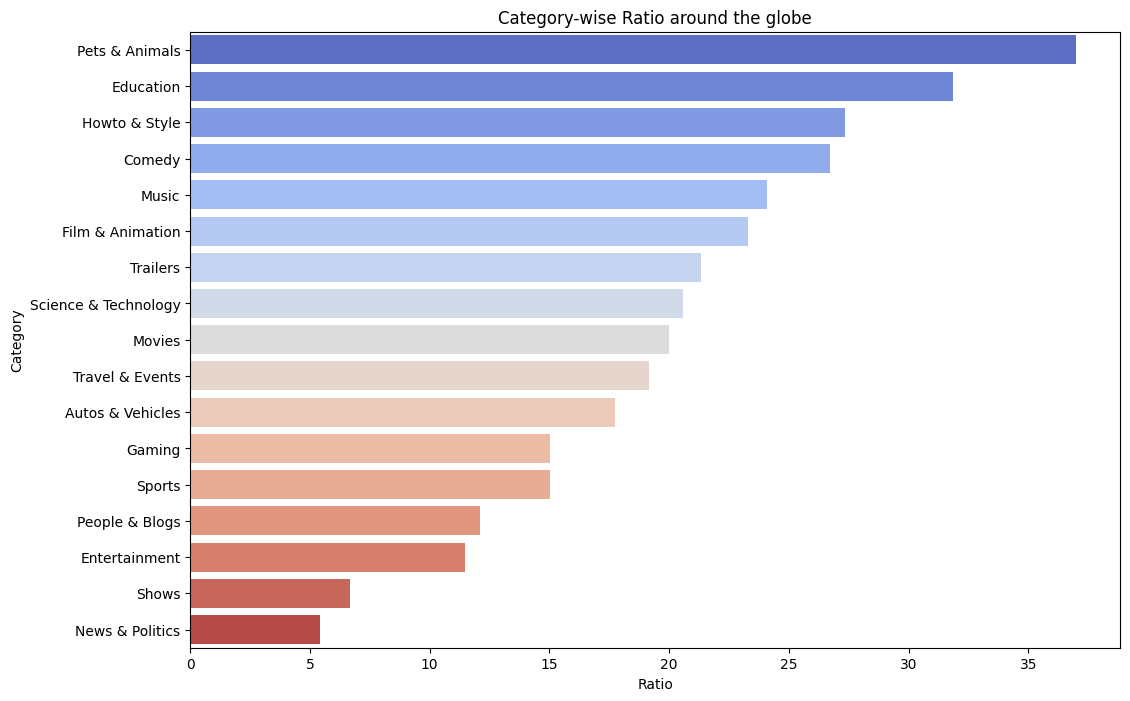

In [52]:
plt.figure(figsize=(12, 8))
sns.barplot(x='ratio', y='category', data=ratiodf, palette='coolwarm')
plt.xlabel('Ratio')
plt.ylabel('Category')
plt.title('Category-wise Ratio around the globe')
plt.show()


In [53]:
category_id

{'1': 'Film & Animation',
 '2': 'Autos & Vehicles',
 '10': 'Music',
 '15': 'Pets & Animals',
 '17': 'Sports',
 '18': 'Short Movies',
 '19': 'Travel & Events',
 '20': 'Gaming',
 '21': 'Videoblogging',
 '22': 'People & Blogs',
 '23': 'Comedy',
 '24': 'Entertainment',
 '25': 'News & Politics',
 '26': 'Howto & Style',
 '27': 'Education',
 '28': 'Science & Technology',
 '30': 'Movies',
 '31': 'Anime/Animation',
 '32': 'Action/Adventure',
 '33': 'Classics',
 '34': 'Comedy',
 '35': 'Documentary',
 '36': 'Drama',
 '37': 'Family',
 '38': 'Foreign',
 '39': 'Horror',
 '40': 'Sci-Fi/Fantasy',
 '41': 'Thriller',
 '42': 'Shorts',
 '43': 'Shows',
 '44': 'Trailers'}

In [54]:
# Converting the keys of category from str to int for compatibility with category_id column of the dataset.
new={}
for x in category_id.keys():
    new[int(x)]=category_id[x]
new

{1: 'Film & Animation',
 2: 'Autos & Vehicles',
 10: 'Music',
 15: 'Pets & Animals',
 17: 'Sports',
 18: 'Short Movies',
 19: 'Travel & Events',
 20: 'Gaming',
 21: 'Videoblogging',
 22: 'People & Blogs',
 23: 'Comedy',
 24: 'Entertainment',
 25: 'News & Politics',
 26: 'Howto & Style',
 27: 'Education',
 28: 'Science & Technology',
 30: 'Movies',
 31: 'Anime/Animation',
 32: 'Action/Adventure',
 33: 'Classics',
 34: 'Comedy',
 35: 'Documentary',
 36: 'Drama',
 37: 'Family',
 38: 'Foreign',
 39: 'Horror',
 40: 'Sci-Fi/Fantasy',
 41: 'Thriller',
 42: 'Shorts',
 43: 'Shows',
 44: 'Trailers'}

# Country-wise Category Ratio

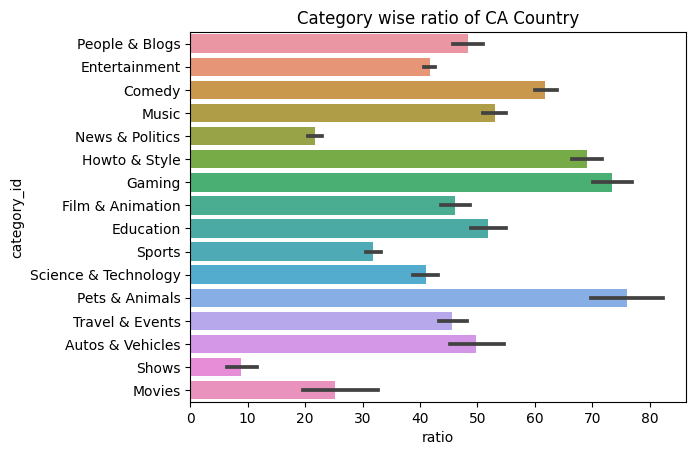

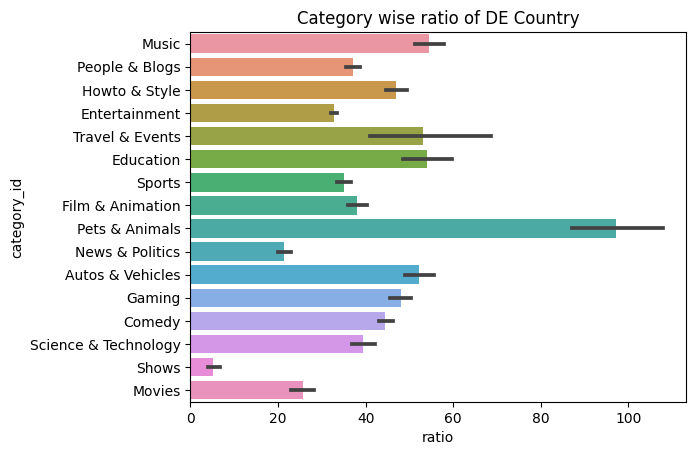

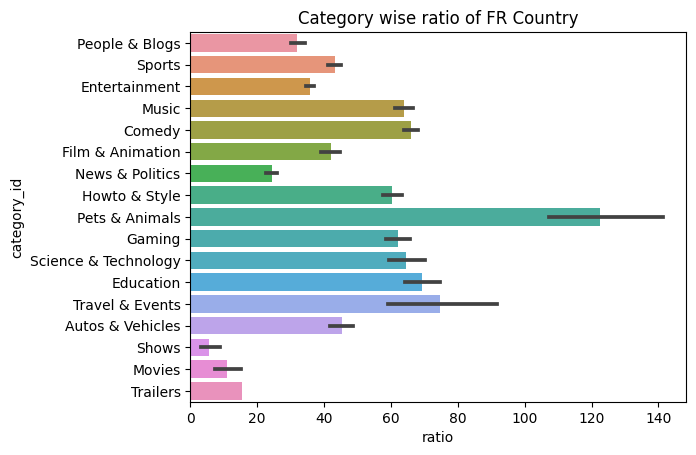

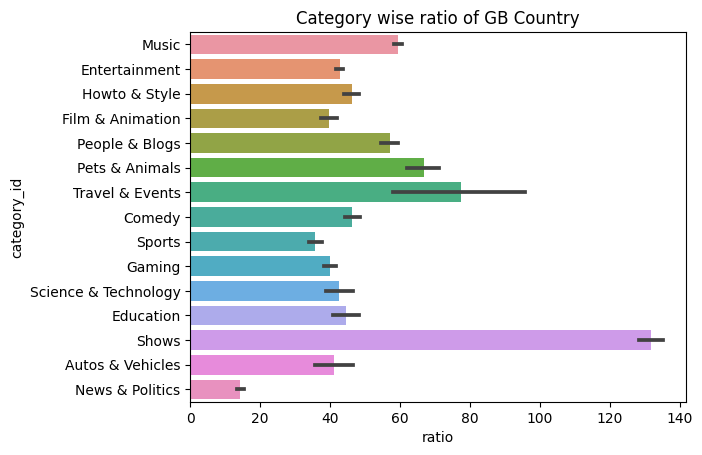

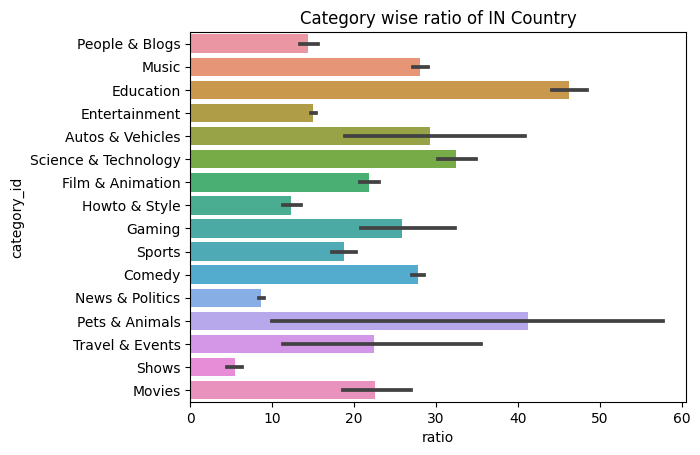

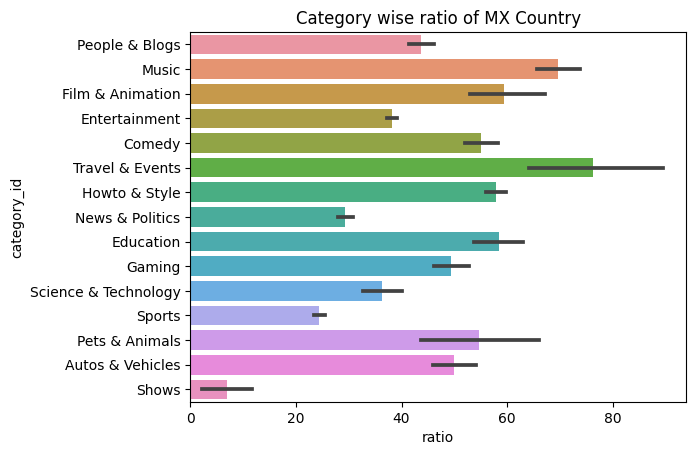

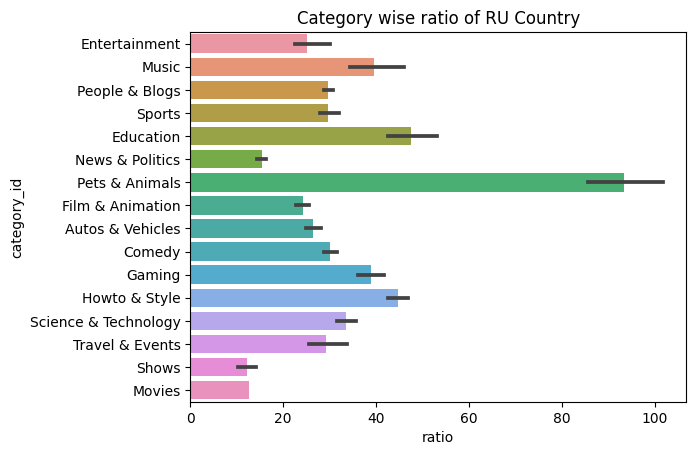

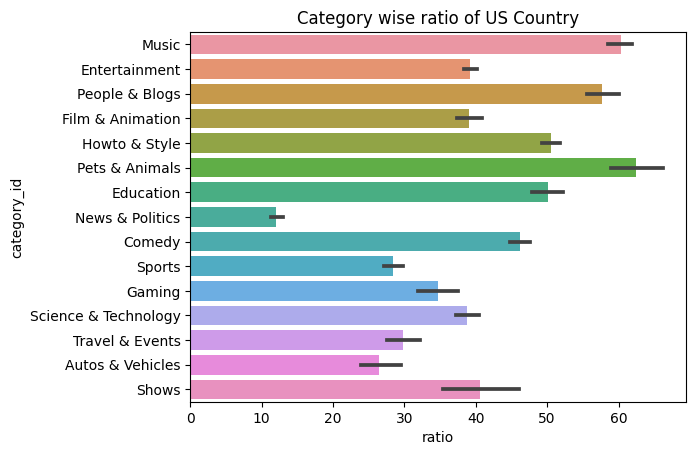

In [55]:
for x in all_csv:
    df=pd.read_csv(x,encoding_errors='ignore')
    df['ratio']=df['likes']/df['dislikes']
    df['ratio'].replace([np.inf,-np.inf],np.nan,inplace=True)
    df.dropna(inplace=True)
    df['category_id']=df['category_id'].map(new)
    df=df.sort_values('ratio',ascending=False)
    sns.barplot(data=df,x='ratio',y='category_id')
    plt.title(f"Category wise ratio of {x[0:2]} Country")
    plt.show()


# Country-wise Total Number of Videos from Respective Categories

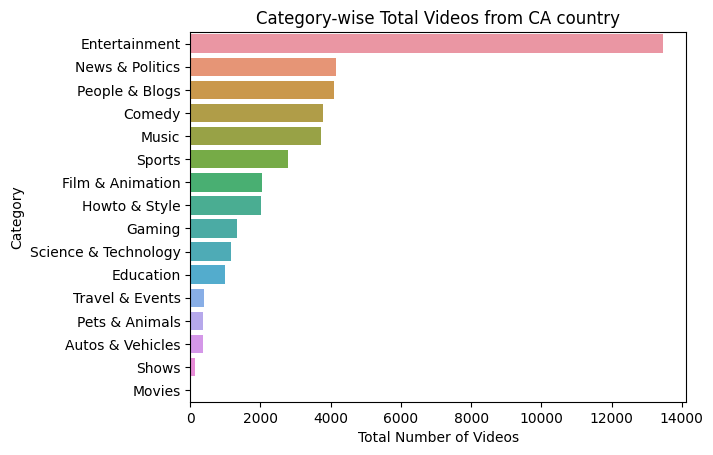

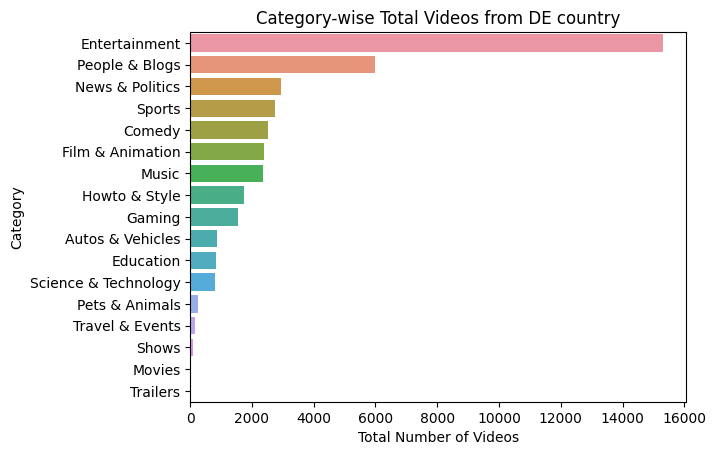

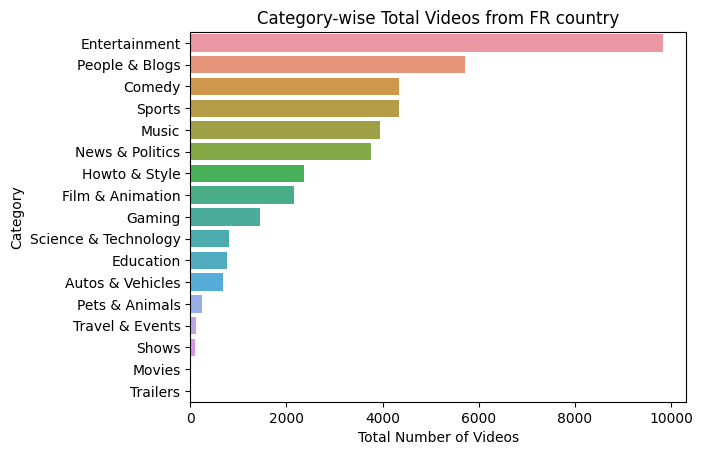

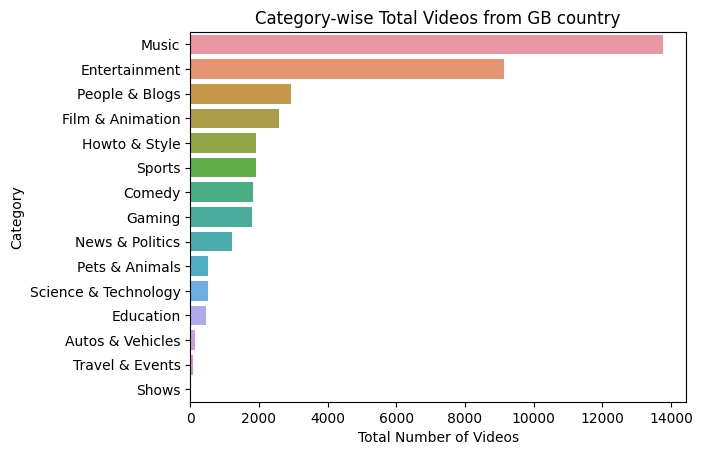

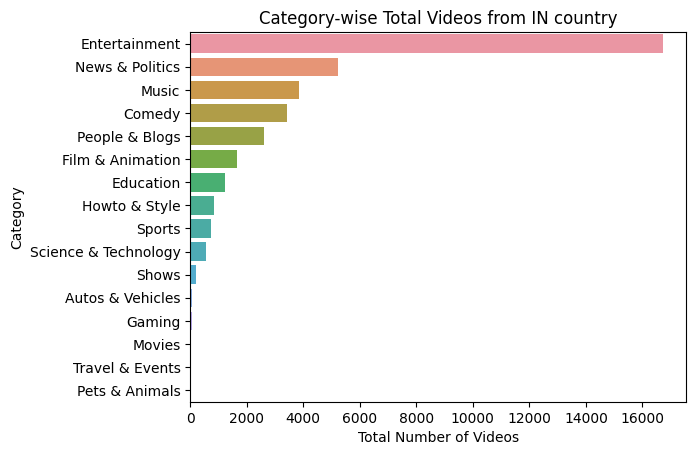

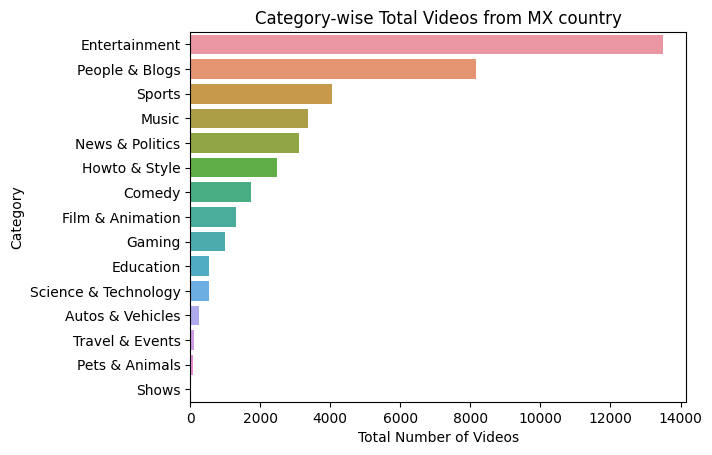

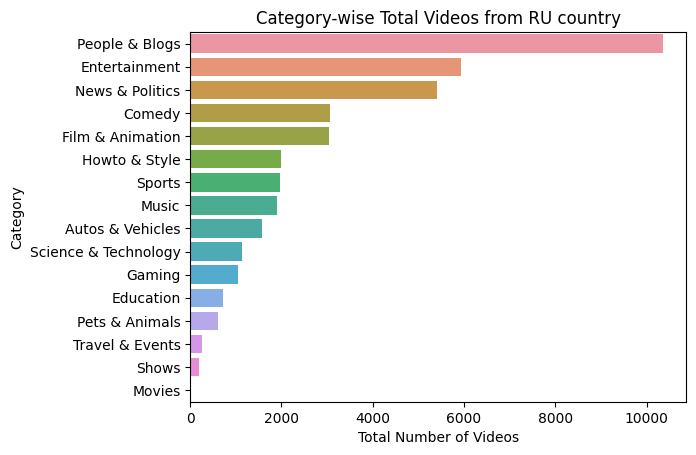

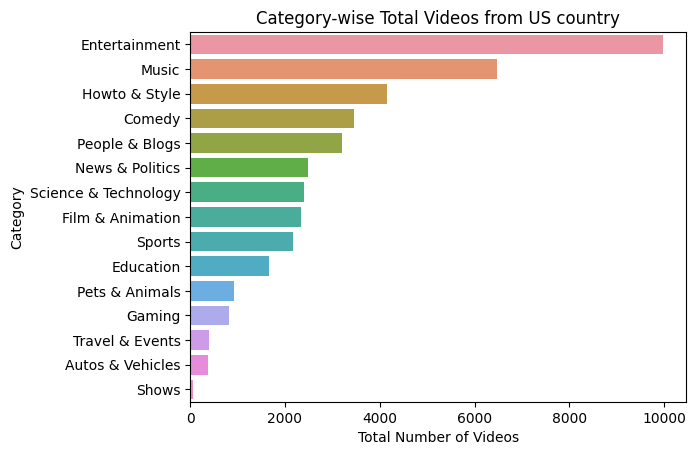

In [56]:

for y in all_csv:
    df=pd.read_csv(y,encoding_errors="ignore")
    df['category_id']=df['category_id'].map(new)
    category_counts = df.groupby('category_id').size().reset_index(name='count')
    category_counts=pd.DataFrame(category_counts)
    category_counts=category_counts.sort_values('count',ascending=False)
    sns.barplot(data=category_counts,x='count',y='category_id')
    plt.xlabel("Total Number of Videos")
    plt.ylabel("Category")
    plt.title(f"Category-wise Total Videos from {y[0:2]} country")
    plt.show()


# Top Trending 5 Videos Country-wise

In [57]:
for x in all_csv:
    df=pd.read_csv(x,encoding_errors="ignore")
    df=df.sort_values("views",ascending=False)
    df.drop_duplicates(inplace=True)
    g=df[['title','views']].groupby('title').sum().sort_values("views",ascending=False)
    g=g.reset_index()
    print(f" Top 5 Trending Videos of country: {x[0:2]}")
    print(g.head())
    print("-------------------------------------------------------------------------")


 Top 5 Trending Videos of country: CA
                                               title      views
0  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  631428335
1  Marvel Studios' Avengers: Infinity War Officia...  577553186
2  Childish Gambino - This Is America (Official V...  411775069
3                  BTS (방탄소년단'FAKE LOVE' Official MV  321743622
4                      VENOM - Official Trailer (HD)  268913813
-------------------------------------------------------------------------
 Top 5 Trending Videos of country: DE
                                               title      views
0  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  368153846
1  Marvel Studios' Avengers: Infinity War Officia...  315890909
2                BTS (방탄소년단) 'FAKE LOVE' Official MV  241005611
3  Childish Gambino - This Is America (Official V...  227197666
4                                    To Our Daughter  191009543
-------------------------------------------------------------------------
 Top 5 T

# Top 5 Most Liked Videos Country-Wise

In [58]:
for x in all_csv:
    df=pd.read_csv(x,encoding_errors="ignore")
    df=df.sort_values("views",ascending=False)
    df.drop_duplicates(inplace=True)
    g=df[['title',"views",'likes']].groupby('title').sum().sort_values("likes",ascending=False)
    g=g.reset_index()
    print(f"Most Liked Videos in country: {x[0:2]}")
    print(g.head())
    print("-------------------------------------------------------------------------")


Most Liked Videos in country: CA
                                               title      views     likes
0                  BTS (방탄소년단'FAKE LOVE' Official MV  321743622  23078610
1  Marvel Studios' Avengers: Infinity War Officia...  577553186  18929848
2  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  631428335  16687951
3  Childish Gambino - This Is America (Official V...  411775069  14593916
4                                 Drake - God’s Plan  190183754  12164958
-------------------------------------------------------------------------
Most Liked Videos in country: DE
                                               title      views     likes
0                BTS (방탄소년단) 'FAKE LOVE' Official MV  241005611  18025272
1  Marvel Studios' Avengers: Infinity War Officia...  315890909  11183069
2  YouTube Rewind: The Shape of 2017 | #YouTubeRe...  368153846  10760732
3  Childish Gambino - This Is America (Official V...  227197666   8711410
4                                 Drake - God’

# Top 5 Liked Categories Country-wise

In [59]:
for x in all_csv:
    df=pd.read_csv(x,encoding_errors="ignore")
    df['category_id']=df['category_id'].map(new)
    df=df[["category_id","views","likes"]]
    grouped_df = df.groupby('category_id').sum()
    result = grouped_df.sort_values('likes', ascending=False)
    print(f"TOP Liked Categories of {x[0:2]}")
    print(result.head())
    print("--------------------------------------------------------------")


TOP Liked Categories of CA
                        views      likes
category_id                             
Music             13179850194  564447530
Entertainment     13671215509  387245433
Comedy             3708438785  196046674
People & Blogs     3228227926  105388564
Film & Animation   2939060844   77802003
--------------------------------------------------------------
TOP Liked Categories of DE
                       views      likes
category_id                            
Music             5683870646  300297066
Entertainment     8102638694  267752272
Comedy            1642158154   74787405
People & Blogs    2193613268   60920058
Film & Animation  1757184336   45315546
--------------------------------------------------------------
TOP Liked Categories of FR
                     views      likes
category_id                          
Music           5026447522  277314234
Comedy          1896284649  130805444
Entertainment   3779500229  118243560
Sports          1996811039   4396456

# Correlation  between Views, Dislikes, Comment Count

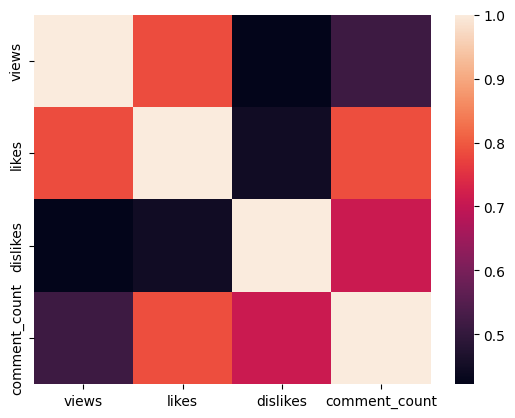

In [60]:
col=['views', 'likes', 'dislikes', 'comment_count']
c=combined_data[col]
sns.heatmap(c.corr())
plt.show()

 This suggest there is strong corelation between views and likes.